In [5]:
#Download Data
# !gdown 15tIjPrstV2RnOMv2VSIKW7yW_M3KjyNa

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
# Loading the Dataset
df_org = pd.read_csv("C:\SaiFiles\DSMLAI\VSCode\cars24-car-price.csv")
df = df_org.copy()
df.head(2)

,full_name,selling_price,year,seller_type,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Maruti Alto Std,1.2,2012.0,Individual,120000,Petrol,Manual,19.7,796.0,46.3,5.0
1,Hyundai Grand i10 Asta,5.5,2016.0,Individual,20000,Petrol,Manual,18.9,1197.0,82.0,5.0


In [40]:
#Checking for missing Values
df.info()

## Looks like there are no missing values in the data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19980 entries, 0 to 19979
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   full_name          19980 non-null  object 
 1   selling_price      19980 non-null  float64
 2   year               19980 non-null  float64
 3   seller_type        19980 non-null  object 
 4   km_driven          19980 non-null  int64  
 5   fuel_type          19980 non-null  object 
 6   transmission_type  19980 non-null  object 
 7   mileage            19980 non-null  float64
 8   engine             19980 non-null  float64
 9   max_power          19980 non-null  float64
 10  seats              19980 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.7+ MB


In [41]:
# Looking at the properties of the Data
display(df.describe())

## selling_price: Looks like the data is in Lakhs
## year: Data is from 1991 to 2021
## mileage: The minimum value = 0, Max = 120. Need to do Outlier Handling
## max_power: Minimum value = 0. Outlier Handling is needed.

,selling_price,year,km_driven,mileage,engine,max_power,seats
count,19980.000000,19980.000000,1.998000e+04,19980.000000,19980.000000,19980.000000,19980.000000
mean,7.392066,2014.525125,5.824488e+04,19.347219,1476.327401,97.854443,5.317868
std,9.103088,3.249185,5.172509e+04,4.620053,520.449398,45.080670,0.835370
min,0.250000,1991.000000,1.000000e+02,0.000000,0.000000,5.000000,2.000000
25%,3.400000,2013.000000,3.116425e+04,16.800000,1197.000000,73.900000,5.000000
50%,5.200000,2015.000000,5.200000e+04,19.160000,1248.000000,86.700000,5.000000
75%,7.850000,2017.000000,7.400000e+04,22.320000,1582.000000,112.000000,5.000000
max,395.000000,2021.000000,3.800000e+06,120.000000,6752.000000,626.000000,14.000000


## Helper Functions

In [107]:

def barplotFeature(featureName, legendData=""):
    plt.figure(figsize=(15, 6))
    if legendData:
        sns.histplot(x=df[featureName], label=legendData)
        plt.legend()
    else:
        sns.histplot(x=df[featureName])
    plt.show()

In [124]:

def lineplotFeature(featureName, legendData=""):
    plt.figure(figsize=(15, 6))
    if legendData:
        sns.lineplot(x=df[featureName], label=legendData)
        plt.legend()
    else:
        sns.lineplot(x=df[featureName])
    plt.show()

## Data Preperation

In [186]:
df = df_org.copy()
df["make"] = df["full_name"].apply(lambda x: x.split(" ")[0])
df["model"] = df["full_name"].apply(lambda x: " ".join(x.split(" ")[1:]))
df.drop(columns=["full_name"], inplace=True)
df = df[['selling_price',  'make', 'model', 'year', 'seller_type', 'km_driven', 'fuel_type',
    'transmission_type', 'mileage', 'engine', 'max_power', 'seats',]]


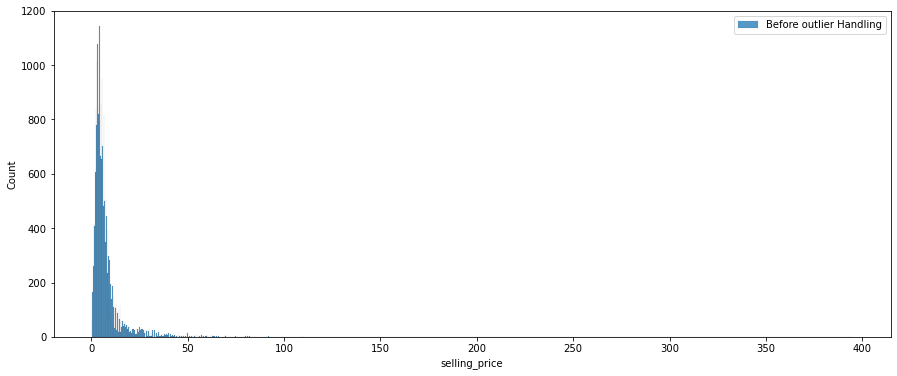

0.99 percentile value: 45.000000
Outlier Data percent to trim: 0.009860


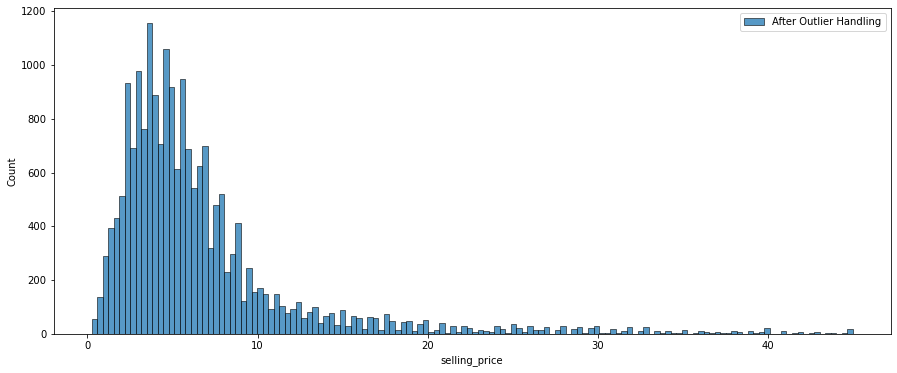

In [187]:
barplotFeature(featureName="selling_price", legendData="Before outlier Handling")
quantileThresholdValue = 0.99
dfCutoffThreshold = df["selling_price"].quantile(quantileThresholdValue)
percentDataRemoved = df.loc[df["selling_price"] > dfCutoffThreshold, "selling_price"].count()/df.shape[0]
print("%0.2f percentile value: %f" % (quantileThresholdValue, dfCutoffThreshold))
print("Outlier Data percent to trim: %f" % percentDataRemoved)

## We have less than 1 Percent of data which is > 100 Lahks selling Price.
## So mathematically consider all selling_price > 100 as outliers.

## dropping Outliers
df = df.loc[df["selling_price"] <= dfCutoffThreshold]
df = df.reset_index(drop=True)
barplotFeature(featureName="selling_price", legendData="After Outlier Handling")

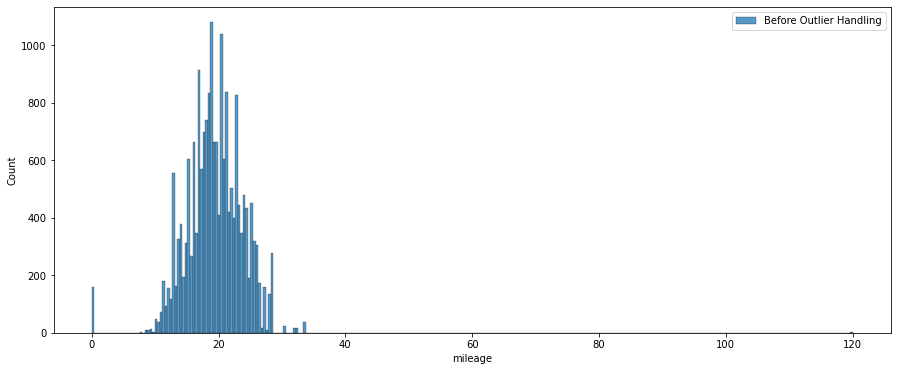

0.01 percentile value: 7.579360
Outlier Data percent to trim: 0.008037


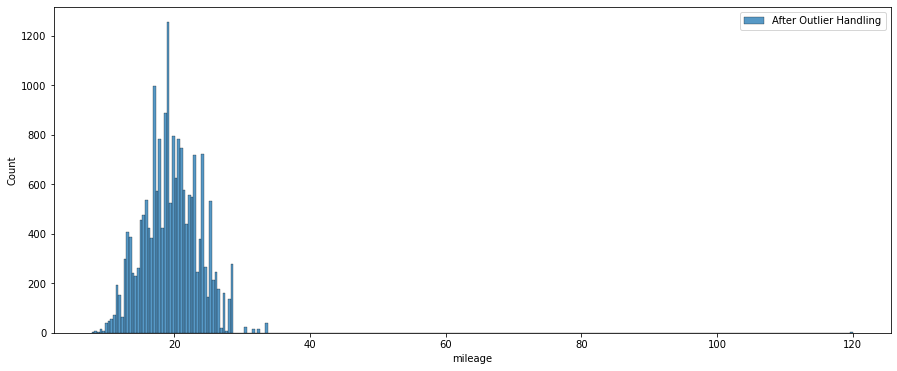

In [188]:
barplotFeature(featureName="mileage", legendData="Before Outlier Handling")
df['mileage'].describe()
quantileThresholdValue = 0.008
dfCutoffThreshold = df["mileage"].quantile(quantileThresholdValue)
percentDataRemoved = df.loc[df["mileage"] < dfCutoffThreshold, "selling_price"].count()/df.shape[0]

print("%0.2f percentile value: %f" % (quantileThresholdValue, dfCutoffThreshold))
print("Outlier Data percent to trim: %f" % percentDataRemoved)

## dropping Outliers
df = df.loc[df["mileage"] >= dfCutoffThreshold]
df = df.reset_index(drop=True)
barplotFeature(featureName="mileage", legendData="After Outlier Handling")

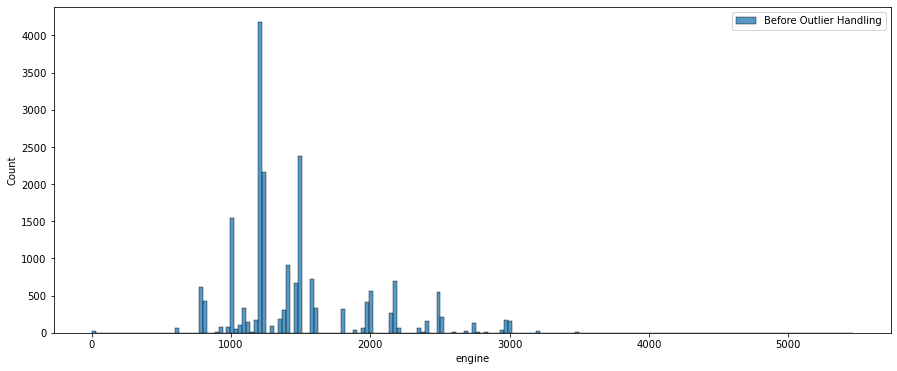

dropping Data Points which have engine power < 10


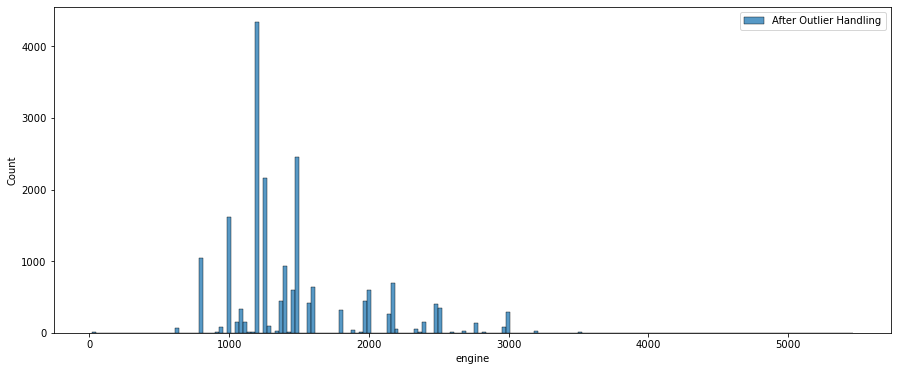

In [191]:
barplotFeature(featureName="engine", legendData="Before Outlier Handling")
df['engine'].describe()
## dropping Outliers
print("dropping Data Points which have engine power < 10")
df = df.loc[df["engine"] >= 10]
df = df.reset_index(drop=True)
barplotFeature(featureName="engine", legendData="After Outlier Handling")